In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# All S1 cells information

In [2]:
import h5py
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

In [3]:
rootFolder = os.getcwd()

In [4]:
rootFolder = '/home/fernando/S1_HFO/'

## Cell Number distribution

In [5]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
# Load 55 Morphological Names-> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names-> L1:14 L23:43 L4:46 L5:52 L6:52

with open(rootFolder + '/sim/cells/S1-cells-distributions-Rat.txt') as metype_file:
    metype_content = metype_file.read()       

MtypeNumber = {}
MEtypeNumber = {}
MtypePop = []
MEtypePop = []
popLabel = {}
N = 0
for line in metype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    MEtypeNumber[metype] = int(n)
    popLabel[metype] = mtype
    MtypeNumber[mtype] = int(m)

    if mtype not in MtypePop:
        MtypePop.append(mtype)
    MEtypePop.append(metype)
    
    N = N + int(n)
    
print ('Number of cells = %d' % N)

Number of cells = 31346


In [6]:
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in MtypePop:
    if popName not in Epops:
        Ipops.append(popName)

In [7]:
## https://bbp.epfl.ch/nmc-portal/assets/documents/static/Download/hoc_combos_syn.1_0_10.allzips.tar
## extracted 1035 folders in home/fernando/Downloads/hoc_combos_syn.1_0_10.allzips/  #~ not inclued in the github

StochKvcells = []
nonStochKvcells = []

for cellName in MEtypePop:
    number = 1 # same for all metype cells
    os.chdir('/home/fernando/Downloads/hoc_combos_syn.1_0_10.allzips/'+cellName+'_'+str(number)+'/')
    
    foldermech = os.listdir('mechanisms/')
    if 'StochKv.mod' in foldermech:
        StochKvcells.append(cellName) 
        if 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]] > 0:
            print('%s %s %.0f%s %d %d' % (cellName, '1', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
#         else:
#             print('%s %s %.0f%s %d %d' % (cellName, '2', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
    else:
        nonStochKvcells.append(cellName)
#         print('%s %s %.0f%s %d %d' % (cellName, '0', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))

os.chdir(rootFolder)

L1_HAC_cIR216 1 11% 10 91
L1_NGC-DA_cSTUT189 1 11% 8 72
L23_BP_bIR215 1 14% 4 28
L23_BP_dSTUT214 1 11% 3 28
L23_BTC_bIR215 1 7% 7 104
L23_DBC_bIR215 1 18% 32 175
L23_LBC_cSTUT189 1 5% 22 456
L23_NBC_cIR216 1 2% 6 268
L23_NGC_cSTUT189 1 9% 5 56
L4_BP_bIR215 1 12% 1 8
L4_BP_dSTUT214 1 12% 1 8
L4_BTC_bIR215 1 10% 2 20
L4_BTC_bSTUT213 1 10% 2 20
L4_DBC_bIR215 1 32% 13 40
L4_DBC_bSTUT213 1 10% 4 40
L4_DBC_cIR216 1 18% 7 40
L4_LBC_cSTUT189 1 25% 31 122
L4_LBC_dSTUT214 1 7% 9 122
L4_NBC_cIR216 1 5% 5 96
L4_NGC_cSTUT189 1 17% 1 6
L5_BP_bIR215 1 15% 5 34
L5_BP_dSTUT214 1 9% 3 34
L5_DBC_bIR215 1 35% 34 96
L5_DBC_bSTUT213 1 9% 9 96
L5_DBC_cIR216 1 18% 17 96
L5_LBC_cIR216 1 6% 13 210
L5_LBC_cSTUT189 1 18% 37 210
L5_LBC_dSTUT214 1 23% 49 210
L5_MC_bIR215 1 11% 44 395
L5_MC_bSTUT213 1 4% 16 395
L5_MC_cSTUT189 1 4% 16 395
L5_NBC_bIR215 1 7% 14 201
L5_NBC_bSTUT213 1 13% 27 201
L5_NBC_cIR216 1 7% 14 201
L5_NBC_cSTUT189 1 20% 40 201
L5_NBC_dSTUT214 1 6% 13 201
L5_NGC_cSTUT189 1 12% 1 8
L6_BP_bIR215 1 14

## StochKv channels

In [8]:
StochKvcellsNumber = 0
for metype in StochKvcells:    
    StochKvcellsNumber = StochKvcellsNumber + MEtypeNumber[metype]

print('cells with StochKv channel = %d (%.2f percent) ' % (StochKvcellsNumber,100.0*StochKvcellsNumber/N))     

cells with StochKv channel = 1137 (3.63 percent) 


## Load efel analysis

In [9]:
pwd

'/home/fernando/S1_HFO'

In [10]:
feature_items = ['Spikecount', 'mean_frequency', 'peak_time', 'peak_voltage', 'ISI_CV', 'AP_width', 
                                                               'AP_amplitude','voltage_base','all_ISI_values', 'ISI_CV', 'steady_state_voltage_stimend']

ampstim =  [0.1*ii for ii in range(1,13)]
durationstim = 2000
delaystim = 700
timesimulation = 3000

feature_efel = {}
for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        with open('runSubNets/Fig2/info_efel/info_efel_12steps_NetPyNE_' + cellName + '.json', 'r') as f:
            feature_efel[cellName] = json.load(f) 

# Mean Frequency

In [28]:
feature_E = {}
feature_I = {}
feature_L5_TTPC = {}
feature_L5_E = {}
feature_L4_E = {}
feature_L5_I = {}
feature_L6_PC = {}

for step_number in range(1,13):  
    feature_E['step_'+str(step_number)] = []
    feature_I['step_'+str(step_number)] = []
    feature_L4_E['step_'+str(step_number)] = []
    feature_L5_E['step_'+str(step_number)] = []
    feature_L5_I['step_'+str(step_number)] = []
    feature_L5_TTPC['step_'+str(step_number)] = []
    feature_L6_PC['step_'+str(step_number)] = []
    

subMEtypePop =['L23_PC_cADpyr229','L4_PC_cADpyr230','L5_TTPC1_cADpyr232','L5_TTPC2_cADpyr232','L6_BPC_cADpyr231','L6_IPC_cADpyr231',
             'L5_BP_bNAC219','L5_BTC_cACint209','L5_ChC_cNAC187','L5_DBC_bNAC219','L5_LBC_dNAC222','L5_MC_cACint209','L5_NBC_bSTUT213',
             'L5_NGC_cNAC187','L5_SBC_bNAC219']

freq_E = {}
freq_I = {}
for cell in MEtypePop: #subMEtypePop: #MEtypePop:
        
    if 'PC' in cell or 'L4_SS' in cell or 'L4_SP' in cell:   
        freq_E[cell] = {}
    else:
        freq_I[cell] = {}
        
    for step_number in range(1,13):  
        if 'PC' in cell or 'L4_SS' in cell or 'L4_SP' in cell:   
            freq_E[cell]['step_'+str(step_number)] = []
        else:
            freq_I[cell]['step_'+str(step_number)] = []
        

for cell in MEtypePop: #subMEtypePop: #MEtypePop:

    for number in range(1,6):
        cellName = cell+'_'+str(number)

        for step_number in range(1,13):    

            if 'PC' in cellName or 'L4_SS' in cellName or 'L4_SP' in cellName:   
                
                freq_E[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0]) 
                
                feature_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])                
                if 'L5_TTPC' == cell[0:7]:
                    feature_L5_TTPC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0]) 
                    
                if 'L4_' == cell[0:3]:
                    feature_L4_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])   
                    
                if 'L5_' == cell[0:3]:
                    feature_L5_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])
                   
                if 'L6_' == cell[0:3]:
                    feature_L6_PC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])   
            else:      
                
                freq_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])               
                         
                feature_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])
                if 'L5_' == cell[0:3]:
                    feature_L5_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])


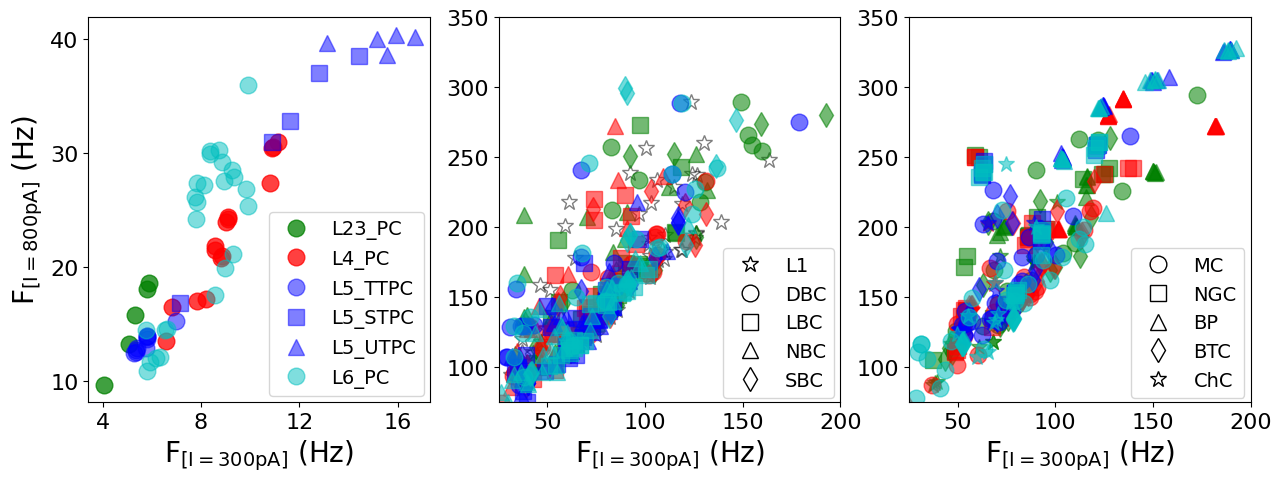

In [30]:
fontsiz=20
figSize = (15,5)
fig = plt.figure(figsize=figSize)  # Open a new figure

symbolList = ['ko','bs','r^','cd','g*','mx']

# ---------------------------------------------------------------------------------- #
plt.subplot(1, 3, 1)
# fig.suptitle('Excitatory                      Inhibitory', fontsize=20)
plt.xlabel(r'F$_{\rm [I=300 pA]}$ (Hz)', fontsize=fontsiz)
plt.ylabel(r'F$_{\rm [I=800 pA]}$ (Hz)', fontsize=fontsiz)
plt.plot(freq_E['L23_PC_cADpyr229']['step_3'],freq_E['L23_PC_cADpyr229']['step_8'], 'go', markersize=12, alpha=0.75, label='L23_PC') 
plt.plot(feature_L4_E['step_3'],feature_L4_E['step_8'], 'ro', markersize=12, alpha=0.75, label='L4_PC') 
plt.plot(feature_L5_TTPC['step_3'],feature_L5_TTPC['step_8'],  'bo', markersize=12, alpha=0.5, label='L5_TTPC') 
plt.plot(freq_E['L5_STPC_cADpyr232']['step_3'],freq_E['L5_STPC_cADpyr232']['step_8'], 'bs', markersize=12, alpha=0.5, label='L5_STPC') 
plt.plot(freq_E['L5_UTPC_cADpyr232']['step_3'],freq_E['L5_UTPC_cADpyr232']['step_8'], 'b^', markersize=12, alpha=0.5, label='L5_UTPC') 
plt.plot(feature_L6_PC['step_3'],feature_L6_PC['step_8'], 'co', markersize=12, alpha=0.5, label='L6_PC') 

plt.yticks(range(10,45,10),fontsize=16)
plt.xticks(range(4,17,4),fontsize=16)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 0.52), fontsize=14)

# ---------------------------------------------------------------------------------- #
symbolList = ['o','s','^','d','*','o','s','^','d']
symbolList2 = {}
for ii,cell in enumerate(['L5_MC_cACint209','L5_NGC_cNAC187','L5_BP_bNAC219','L5_BTC_cACint209','L5_ChC_cNAC187','L5_DBC_bNAC219','L5_LBC_dNAC222','L5_NBC_bSTUT213','L5_SBC_bNAC219']):   
    symbolList2[cell.split('_')[1]] = symbolList[ii]

symbolList3 = {}
colorList3 = ['g', 'r', 'b', 'c']
for color,layer in enumerate(['L23', 'L4', 'L5', 'L6']):
    for metype in symbolList2.keys():
        symbolList3[layer+'_'+metype] = colorList3[color]+symbolList2[metype]
    
# ---------------------------------------------------------------------------------- #
plt.subplot(1, 3, 2)
plt.xlabel(r'F$_{\rm [I=300 pA]}$ (Hz)', fontsize=fontsiz)

plt.plot([-10],[-10],'k*', markersize=12, mfc='none', label='L1')     
for ii,cell in enumerate(['L5_DBC_bNAC219','L5_LBC_dNAC222','L5_NBC_bSTUT213','L5_SBC_bNAC219']):   
    plt.plot([-10],[-10], 'k'+symbolList[ii+5], markersize=12, mfc='none', label=cell.split('_')[1]) 
    
for cell in list(freq_I.keys())[0:14]:   # L1
    plt.plot(freq_I[cell]['step_3'],freq_I[cell]['step_8'],'k*', mfc='none', markersize=12, alpha=0.5) 

for cell in list(freq_I.keys())[14:]:            
    if 'BC' in cell:
        plt.plot(freq_I[cell]['step_3'],freq_I[cell]['step_8'], symbolList3[cell.split('_')[0]+'_'+cell.split('_')[1]], markersize=12, alpha=0.55) 

plt.xlim(25, 200)
plt.ylim(75, 350)
plt.yticks(fontsize=16)
plt.xticks(range(50,250,50),fontsize=16)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 0.425), fontsize=14);
# ---------------------------------------------------------------------------------- #
plt.subplot(1, 3, 3)
plt.xlabel(r'F$_{\rm [I=300 pA]}$ (Hz)', fontsize=fontsiz)

for ii,cell in enumerate(['L5_MC_cACint209','L5_NGC_cNAC187','L5_BP_bNAC219','L5_BTC_cACint209','L5_ChC_cNAC187']):   
    plt.plot([-10],[-10], 'k'+symbolList[ii], markersize=12, mfc='none', label=cell.split('_')[1]) 
       
for cell in list(freq_I.keys())[14:]:            
    if 'BC' not in cell:
        plt.plot(freq_I[cell]['step_3'],freq_I[cell]['step_8'], symbolList3[cell.split('_')[0]+'_'+cell.split('_')[1]], markersize=12, alpha=0.55) 

plt.xlim(25, 200)
plt.ylim(75, 350)
plt.yticks(fontsize=16)
plt.xticks(range(50,250,50),fontsize=16)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.01, 0.425), fontsize=14);

plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/Freq_300_800pA_ALL.png', facecolor = 'white' , dpi=300);

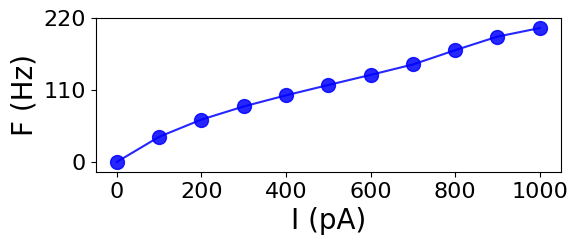

In [14]:
freq_I = {}
for cell in MEtypePop: #subMEtypePop: #MEtypePop:
    freq_I[cell] = {}
    for step_number in range(1,13):  
        freq_I[cell]['step_'+str(step_number)] = []
        

for cell in MEtypePop: #subMEtypePop: #MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        for step_number in range(1,13):                   
            freq_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])           

freq_M = {}
for cell in freq_I.keys():
    freq_M[cell] = []
    freq_M[cell].append(0.0) 

for cell in freq_I.keys():
    for step_number in range(1,11):   
        freq_M[cell].append(np.mean(freq_I[cell]['step_'+str(step_number)])) 
#     if cell[0:2] == 'L5' and freq_M[cell][-1]>199:
#         print(cell,MEtypeNumber[cell],freq_M[cell][-1])


# 'L5_BTC_cNAC187'
# plot
fontsiz=20
figSize = (6,2)
fig = plt.figure(figsize=figSize)  # Open a new figure

plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.xlabel('I (pA)', fontsize=fontsiz)
plt.yticks([0,110,220],fontsize=16)
plt.xticks(fontsize=16)   
plt.xlim(-50, 1050)
plt.ylim(-15, 220)                 
symbolList = ['bo-']
for ii,cell in enumerate(['L5_BTC_cNAC187']): 
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell) 

plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/F_I_L5_BTC_cNAC187.png', facecolor = 'white' , dpi=300)

# 1st and 2nd Inter-spike intervals (ISIs)

In [15]:
feature_E = {}
feature_I = {}
feature_L5_TTPC = {}
feature_L5_E = {}
feature_L4_E = {}
feature_L5_I = {}
feature_L6_PC = {}

for step_number in range(1,13):  
    feature_E['step_'+str(step_number)] = []
    feature_I['step_'+str(step_number)] = []
    feature_L4_E['step_'+str(step_number)] = []
    feature_L5_E['step_'+str(step_number)] = []
    feature_L5_I['step_'+str(step_number)] = []
    feature_L5_TTPC['step_'+str(step_number)] = []
    feature_L6_PC['step_'+str(step_number)] = []
    
freq_E = {}
freq_I = {}
for cell in MEtypePop: #subMEtypePop: #MEtypePop:
    freq_E[cell] = {}
    freq_I[cell] = {}
    for step_number in range(1,13):  
        freq_E[cell]['step_'+str(step_number)] = []
        freq_I[cell]['step_'+str(step_number)] = []
        
feature2_E = {}
feature2_I = {}
feature2_L5_TTPC = {}
feature2_L5_E = {}
feature2_L4_E = {}
feature2_L5_I = {}
feature2_L6_PC = {}

for step_number in range(1,13):  
    feature2_E['step_'+str(step_number)] = []
    feature2_I['step_'+str(step_number)] = []
    feature2_L4_E['step_'+str(step_number)] = []
    feature2_L5_E['step_'+str(step_number)] = []
    feature2_L5_I['step_'+str(step_number)] = []
    feature2_L5_TTPC['step_'+str(step_number)] = []
    feature2_L6_PC['step_'+str(step_number)] = []
    
freq2_E = {}
freq2_I = {}
for cell in MEtypePop: #subMEtypePop: #MEtypePop:
    freq2_E[cell] = {}
    freq2_I[cell] = {}
    for step_number in range(1,13):  
        freq2_E[cell]['step_'+str(step_number)] = []
        freq2_I[cell]['step_'+str(step_number)] = []

feature3_E = {}
feature3_I = {}
feature3_L5_TTPC = {}
feature3_L5_E = {}
feature3_L4_E = {}
feature3_L5_I = {}
feature3_L6_PC = {}

for step_number in range(1,13):  
    feature3_E['step_'+str(step_number)] = []
    feature3_I['step_'+str(step_number)] = []
    feature3_L4_E['step_'+str(step_number)] = []
    feature3_L5_E['step_'+str(step_number)] = []
    feature3_L5_I['step_'+str(step_number)] = []
    feature3_L5_TTPC['step_'+str(step_number)] = []
    feature3_L6_PC['step_'+str(step_number)] = []
    
freq3_E = {}
freq3_I = {}
for cell in MEtypePop: #subMEtypePop: #MEtypePop:
    freq3_E[cell] = {}
    freq3_I[cell] = {}
    for step_number in range(1,13):  
        freq3_E[cell]['step_'+str(step_number)] = []
        freq3_I[cell]['step_'+str(step_number)] = []
     

for cell in MEtypePop: #subMEtypePop: #MEtypePop:

    for number in range(1,6):
        cellName = cell+'_'+str(number)

        for step_number in range(8,9):    

            if 'PC' in cellName or 'L4_SS' in cellName or 'L4_SP' in cellName:   
                
                freq_E[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0]) 
                freq2_E[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1]) 
                freq3_E[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2]) 
                
                feature_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])   
                feature2_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])   
                feature3_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])   
                
                if 'L5_TTPC' == cell[0:7]:
                    feature_L5_TTPC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0]) 
                    feature2_L5_TTPC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1]) 
                    feature3_L5_TTPC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2]) 
                    
                if 'L4_' == cell[0:3]:
                    feature_L4_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])  
                    feature2_L4_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])   
                    feature3_L4_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])    
                    
                if 'L5_' == cell[0:3]:
                    feature_L5_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])
                    feature2_L5_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])
                    feature3_L5_E['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])
                   
                if 'L6_' == cell[0:3]:
                    feature_L6_PC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])  
                    feature2_L6_PC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])  
                    feature3_L6_PC['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])   
            else:      
                
                freq_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])  
                freq2_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1]) 
#                 freq3_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])              
                         
                feature_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])
                feature2_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])
#                 feature3_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])
                if 'L5_' == cell[0:3]:
                    feature_L5_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][0])
                    feature2_L5_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][1])
#                     feature3_L5_I['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['all_ISI_values'][2])


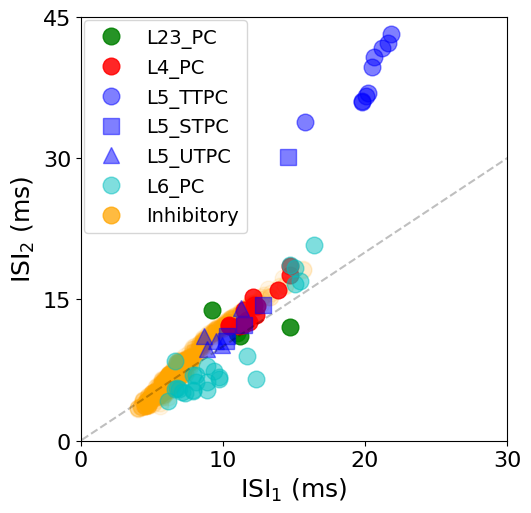

In [16]:
fontsiz=18
figSize = (5.5,5.5)
fig = plt.figure(figsize=figSize)  # Open a new figure
# subMEtypePop =['L23_PC_cADpyr229','L4_PC_cADpyr230','L5_TTPC1_cADpyr232','L5_TTPC2_cADpyr232','L6_BPC_cADpyr231','L6_IPC_cADpyr231',
symbolList = ['ko','bs','r^','cd','g*','mx']

plt.xlabel(r'ISI$_{\rm 1}$ (ms)', fontsize=fontsiz)
plt.ylabel(r'ISI$_{\rm 2}$ (ms)', fontsize=fontsiz)
plt.plot(feature_I['step_8'],feature2_I['step_8'], 'o', color='orange', markersize=12, alpha=0.1) 
plt.plot(freq_E['L23_PC_cADpyr229']['step_8'],freq2_E['L23_PC_cADpyr229']['step_8'], 'go', markersize=12, alpha=0.85, label='L23_PC') 
plt.plot(feature_L4_E['step_8'],feature2_L4_E['step_8'], 'ro', markersize=12, alpha=0.85, label='L4_PC') 
# plt.plot(feature_L5_E['step_8'],feature2_L5_E['step_8'], 'r^', markersize=10, label='L5_PC') 
plt.plot(feature_L5_TTPC['step_8'],feature2_L5_TTPC['step_8'], 'bo', markersize=12, alpha=0.5, label='L5_TTPC') 
plt.plot(freq_E['L5_STPC_cADpyr232']['step_8'],freq2_E['L5_STPC_cADpyr232']['step_8'], 'bs', markersize=12, alpha=0.5, label='L5_STPC') 
plt.plot(freq_E['L5_UTPC_cADpyr232']['step_8'],freq2_E['L5_UTPC_cADpyr232']['step_8'], 'b^', markersize=12, alpha=0.5, label='L5_UTPC') 
plt.plot(feature_L6_PC['step_8'],feature2_L6_PC['step_8'], 'co', markersize=12, alpha=0.5, label='L6_PC') 
plt.plot([-10],[-10], 'o', color='orange', markersize=12, alpha=0.75, label='Inhibitory') 
plt.plot([-10,45],[-10,45], 'k--', markersize=12, alpha=0.25) 
plt.xlim(0, 30)
plt.ylim(0, 45)
plt.yticks([0,15,30,45],fontsize=16)
plt.xticks([0,10,20,30],fontsize=16)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(-0.015, 1.015), fontsize=14);

plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/ISI_1_2_ALL.png', facecolor = 'white' , dpi=300);

# Freq. x I

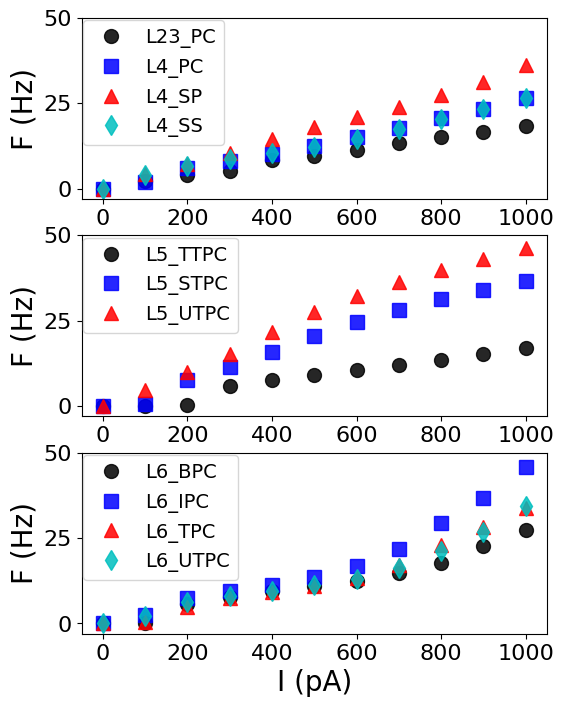

In [17]:
freq_E = {}
for cell2 in MEtypePop: #subMEtypePop: #MEtypePop:
    cell = cell2[0:7]
    freq_E[cell] = {}
    for step_number in range(1,13):  
        freq_E[cell]['step_'+str(step_number)] = []        

for cell2 in MEtypePop: #subMEtypePop: #MEtypePop:
    cell = cell2[0:7]
    for number in range(1,6):
        cellName = cell2+'_'+str(number)
        for step_number in range(1,13):                   
            freq_E[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])           

freq_M = {}
for cell in freq_E.keys():
    freq_M[cell] = []
    freq_M[cell].append(0.0) 

for cell in freq_E.keys():
    for step_number in range(1,11):   
        freq_M[cell].append(np.mean(freq_E[cell]['step_'+str(step_number)])) 

# ---------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------- #
# plot
fontsiz=20
figSize = (6,8)
fig = plt.figure(figsize=figSize)  # Open a new figure


plt.subplot(3, 1, 1)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks([0,25,50],fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-3, 50)                
symbolList = ['ko','bs','r^','cd','g*']
for ii,cell in enumerate(['L23_PC_', 'L4_PC_c','L4_SP_c',  'L4_SS_c']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[0]+'_'+cell.split('_')[1]) 
plt.legend(loc='upper left', bbox_to_anchor=(-0.0175, 1.04), fontsize=14);

# ---------------------------------------------------------------------------------- #
plt.subplot(3, 1, 2)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks([0,25,50],fontsize=16)
plt.xticks(fontsize=16)   
plt.xlim(-50, 1050)
plt.ylim(-3, 50)                 
symbolList = ['ko','bs','r^','cd','g*']
for ii,cell in enumerate(['L5_TTPC','L5_STPC','L5_UTPC']): 
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell) 
plt.legend(loc='upper left', bbox_to_anchor=(-0.0175, 1.04), fontsize=14);

# ---------------------------------------------------------------------------------- #
plt.subplot(3, 1, 3)
plt.xlabel('I (pA)', fontsize=fontsiz)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks([0,25,50],fontsize=16)
plt.xticks(fontsize=16)  
plt.xlim(-50, 1050)
plt.ylim(-3, 50)            
symbolList = ['ko','bs','r^','cd','g*']
for ii,cell in enumerate(['L6_BPC_','L6_IPC_','L6_TPC_', 'L6_UTPC']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[0]+'_'+cell.split('_')[1]) 
plt.legend(loc='upper left', bbox_to_anchor=(-0.0175, 1.04), fontsize=14);

plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/F_I_PCs.png', facecolor = 'white' , dpi=300);
                    

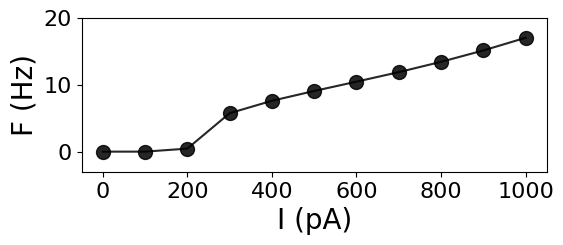

In [18]:
# plot
fontsiz=20
figSize = (6,2)
fig = plt.figure(figsize=figSize)  # Open a new figure

plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.xlabel('I (pA)', fontsize=fontsiz)
plt.yticks([0,10,20],fontsize=16)
plt.xticks(fontsize=16)   
plt.xlim(-50, 1050)
plt.ylim(-3, 20)                 
symbolList = ['ko-']
for ii,cell in enumerate(['L5_TTPC']): 
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell) 

plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/F_I_L5_TTPC.png', facecolor = 'white' , dpi=300)

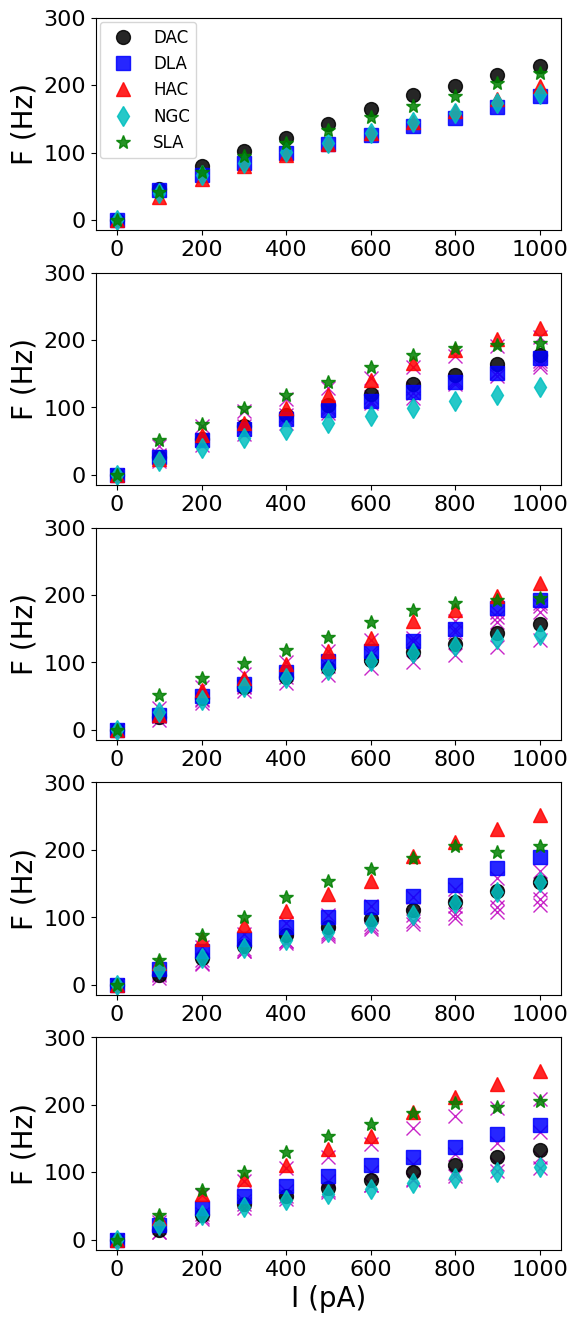

In [19]:
freq_I = {}
for cell2 in MEtypePop: #subMEtypePop: #MEtypePop:
    cell = cell2[0:6]
    freq_I[cell] = {}
    for step_number in range(1,13):  
        freq_I[cell]['step_'+str(step_number)] = []
        

for cell2 in MEtypePop: #subMEtypePop: #MEtypePop:
    cell = cell2[0:6]
    for number in range(1,6):
        cellName = cell2+'_'+str(number)
        for step_number in range(1,13):                   
            freq_I[cell]['step_'+str(step_number)].append(feature_efel[cellName]['step_'+str(step_number)]['mean_frequency'][0])           

freq_M = {}
for cell in freq_I.keys():
    freq_M[cell] = []
    freq_M[cell].append(0.0) 

for cell in freq_I.keys():
    for step_number in range(1,11):   
        freq_M[cell].append(np.mean(freq_I[cell]['step_'+str(step_number)])) 

# ---------------------------------------------------------------------------------- #
# ---------------------------------------------------------------------------------- #
# plot
fontsiz=20
figSize = (6,16)
fig = plt.figure(figsize=figSize)  # Open a new figure     
symbolList = ['ko','bs','r^','cd','g*','mx']

# ---------------------------------------------------------------------------------- #
plt.subplot(5, 1, 1)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks(range(0,400,100),fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-15, 300)     
for ii,cell in enumerate(list(freq_M.keys())[0:5]):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[1]) 
plt.legend(loc='upper left', bbox_to_anchor=(-0.01, 1.02), fontsize=12);

# ---------------------------------------------------------------------------------- #

plt.subplot(5, 1, 2)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks(range(0,400,100),fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-15, 300)     
for ii,cell in enumerate(['L23_DB', 'L23_LB', 'L23_NB']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[5], markersize=10, alpha=0.85) 
plt.plot(range(0,1100,100),freq_M['L23_SB'], symbolList[5], markersize=10, alpha=0.85, label='BC')       
for ii,cell in enumerate(['L23_MC', 'L23_Ch', 'L23_NG', 'L23_BT','L4_BP_']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[1]) 
# plt.legend(loc='upper left', bbox_to_anchor=(-0.015, 1.04), fontsize=12);

# ---------------------------------------------------------------------------------- #
plt.subplot(5, 1, 3)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks(range(0,400,100),fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-15, 300)     
for ii,cell in enumerate(['L4_DBC', 'L4_LBC', 'L4_NBC']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[5], markersize=10, alpha=0.85) 
plt.plot(range(0,1100,100),freq_M['L4_SBC'], symbolList[5], markersize=10, alpha=0.85, label='BC')     
for ii,cell in enumerate(['L4_MC_', 'L4_ChC', 'L4_NGC', 'L4_BTC','L4_BP_']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[1]) 
# plt.legend(loc='upper left', bbox_to_anchor=(-0.015, 1.04), fontsize=12);

# ---------------------------------------------------------------------------------- #
plt.subplot(5, 1, 4)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.yticks(range(0,400,100),fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-15, 300)     
for ii,cell in enumerate(['L5_DBC', 'L5_LBC', 'L5_NBC']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[5], markersize=10, alpha=0.85) 
plt.plot(range(0,1100,100),freq_M['L5_SBC'], symbolList[5], markersize=10, alpha=0.85, label='BC')     
for ii,cell in enumerate(['L5_MC_', 'L5_ChC', 'L5_NGC', 'L5_BTC','L5_BP_']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[1]) 
# plt.legend(loc='upper left', bbox_to_anchor=(-0.015, 1.04), fontsize=12);

# ---------------------------------------------------------------------------------- #
plt.subplot(5, 1, 5)
plt.ylabel('F (Hz)', fontsize=fontsiz)
plt.xlabel('I (pA)', fontsize=fontsiz)
plt.yticks(range(0,400,100),fontsize=16)
plt.xticks(fontsize=16)    
plt.xlim(-50, 1050)
plt.ylim(-15, 300)     
for ii,cell in enumerate(['L6_DBC', 'L6_LBC', 'L6_NBC']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[5], markersize=10, alpha=0.85) 
plt.plot(range(0,1100,100),freq_M['L6_SBC'], symbolList[5], markersize=10, alpha=0.85, label='BC')     
for ii,cell in enumerate(['L6_MC_', 'L6_ChC', 'L6_NGC', 'L6_BTC','L6_BP_']):   
    plt.plot(range(0,1100,100),freq_M[cell], symbolList[ii], markersize=10, alpha=0.85, label=cell.split('_')[1]) 
# plt.legend(loc='upper left', bbox_to_anchor=(1.015, 1.04), fontsize=12);
                    
plt.savefig('/home/fernando/S1_HFO/runSubNets/Fig2/F_I_INTs.png', facecolor = 'white' , dpi=300);